## Network Aggregation Diagnosis

by: arezoo besharati, July 2018

In [1]:
import pandas as pd, numpy as np

import pandana as pdna
import orca 

import matplotlib.cbook
import seaborn as sns

import warnings;warnings.simplefilter('ignore')
%matplotlib notebook


import os; os.chdir('../')

from scripts import datasources
from scripts import models


In [2]:

d = 'data/'
nodesdrive = pd.read_csv(d + 'bay_area_drive_full_nodes.csv').set_index('osmid')
edgesdrive = pd.read_csv(d + 'bay_area_drive_full_edges.csv')
netdrive = pdna.Network(nodesdrive.x, nodesdrive.y, edgesdrive.u, edgesdrive.v, edgesdrive[['length']], twoway=False)
        

In [ ]:
# nodesdrive is the raw csv for nodes from Geof
print(nodesdrive.shape)

nodesdrive.head()


In [3]:
%%capture
orca.run(["initialize_network_drive", 
          "network_aggregations_drive"])

In [4]:
# nodesdrive after network aggregation
nodesdrive_after = orca.get_table('nodesdrive').to_frame()

In [5]:
nodesdrive_after.shape

(228066, 12)

In [6]:
nodesdrive_after.columns.tolist()

['residential_units_500',
 'residential_units_1500',
 'population_1500',
 'poor_1500',
 'renters_1500',
 'med_income_1500',
 'ave_income_1500',
 'ave_income_500',
 'job_1500',
 'job_400',
 'ave_hhsize',
 'med_rent_sqft_1500']

In [29]:
#assign coardinates to nodesdrive_after from nodesdrive

nodesdrive_after= nodesdrive_after.merge(nodesdrive, how='outer', left_index=True, right_index=True)


### Explore residential_units_500

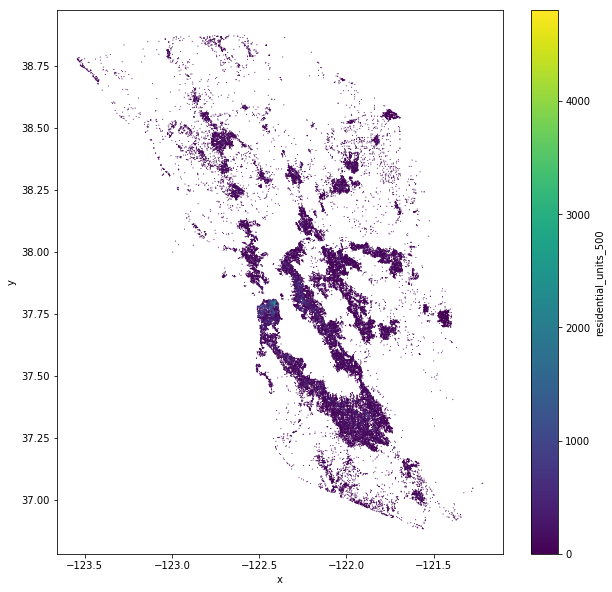

In [71]:
import mplleaflet as mpll
%matplotlib inline

import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(10, 10)) 
# #kwargs={'cmap':'gist_heat_r','s':4}
# nodesdrive_after.plot.scatter('x','y', c='residential_units_500')
# mplleaflet.display(fig = fig)

#mplleaflet.show(fig=ax.figure, tiles='cartodb_positron', path='sgmap.html')


data = nodesdrive_after.sample(50000)
f, ax = plt.subplots(1, figsize=(10, 10))
data.plot(kind='scatter', x='x', y='y', c='residential_units_500',cmap='viridis', s=1, 
          linewidth=0, ax=ax, legend=True)
#mpll.show(fig=f,tiles='cartodb_positron', path='sgmap.html')

In [22]:
! pip install mplleaflet

  Running setup.py bdist_wheel for mplleaflet ... done
  Stored in directory: /Users/arezoobzadeh/Library/Caches/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


<IPython.core.display.Javascript object>


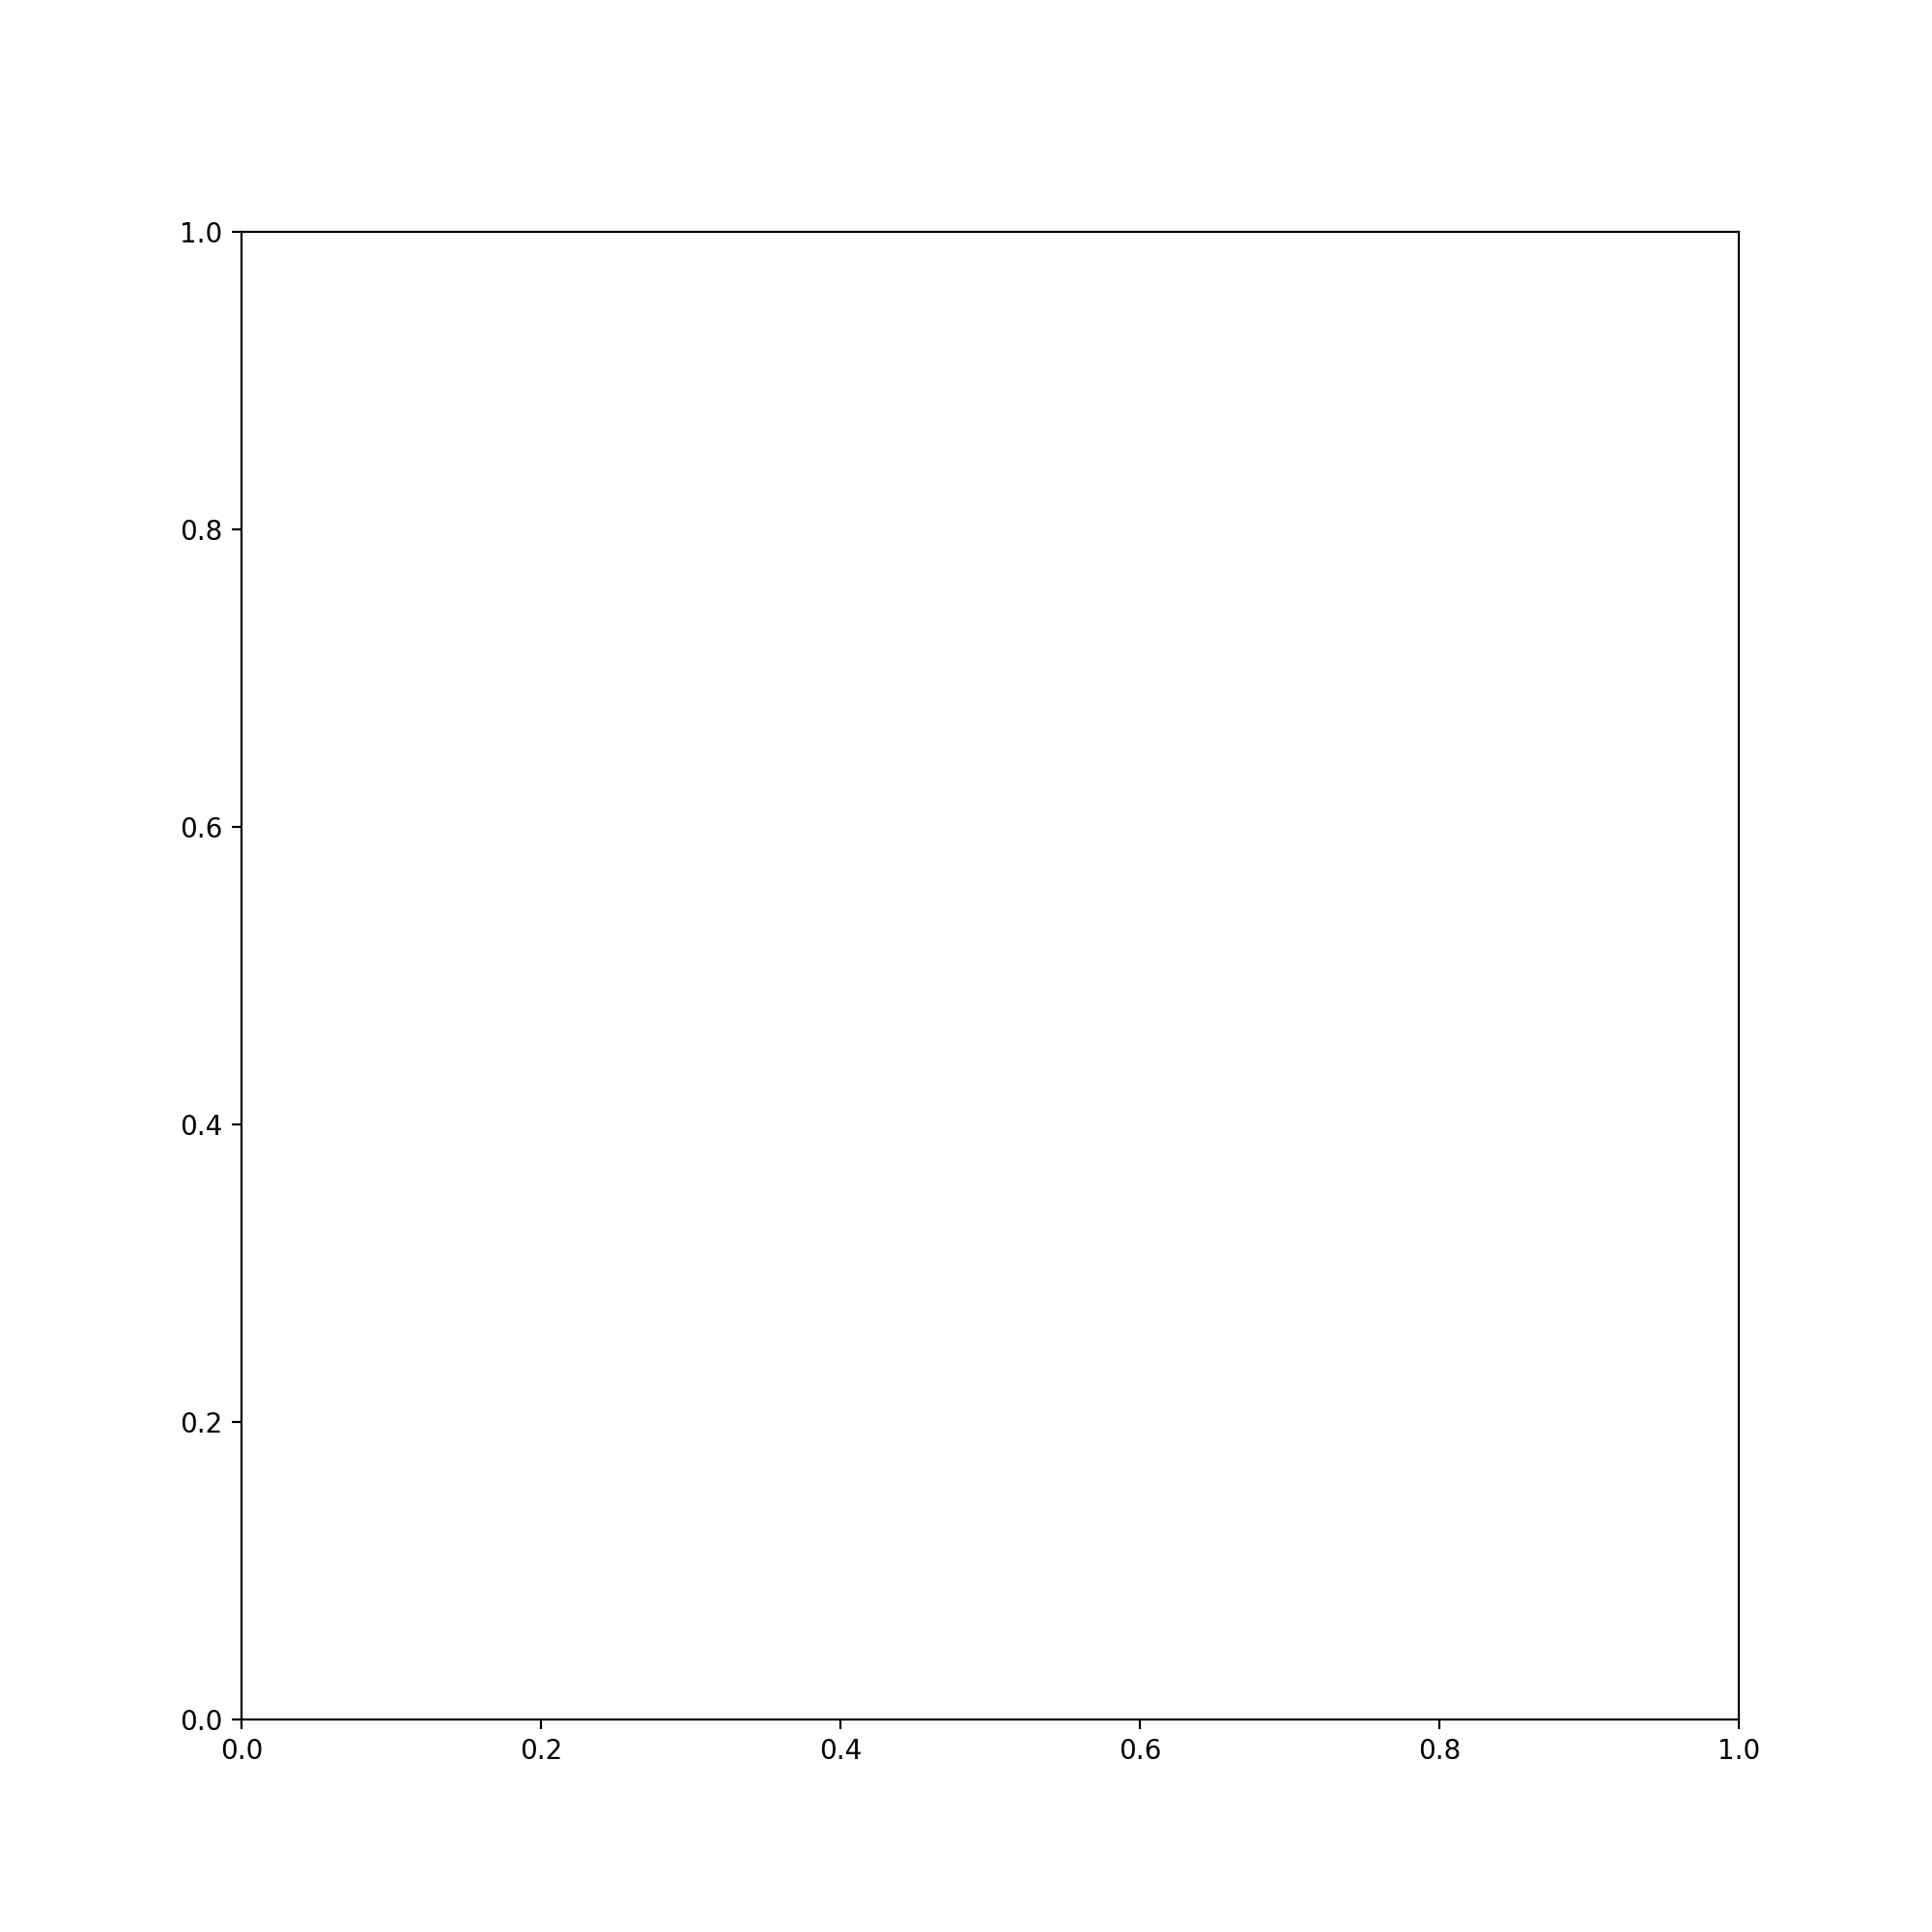

TypeError: plot() got an unexpected keyword argument 'ax'

In [25]:

f=plt.figure(figsize=(10, 10))
ax = f.gca()
kw = dict(column='job_1500', k=6, cmap='YlGnBu', alpha=1, legend=True, edgecolor='gray', linewidth=0.5)
netdrive.plot(scheme='quantiles', ax=ax, **kw)
ax.set_axis_off()
mplleaflet.show(fig=ax.figure, tiles='cartodb_positron', path='sgmap.html')










count    2.280660e+05
mean     1.047287e+09
std      4.869444e+09
min      0.000000e+00
25%      2.801366e+07
50%      1.675765e+08
75%      7.332766e+08
max      2.045542e+11
Name: job_1500, dtype: float64


<IPython.core.display.Javascript object>


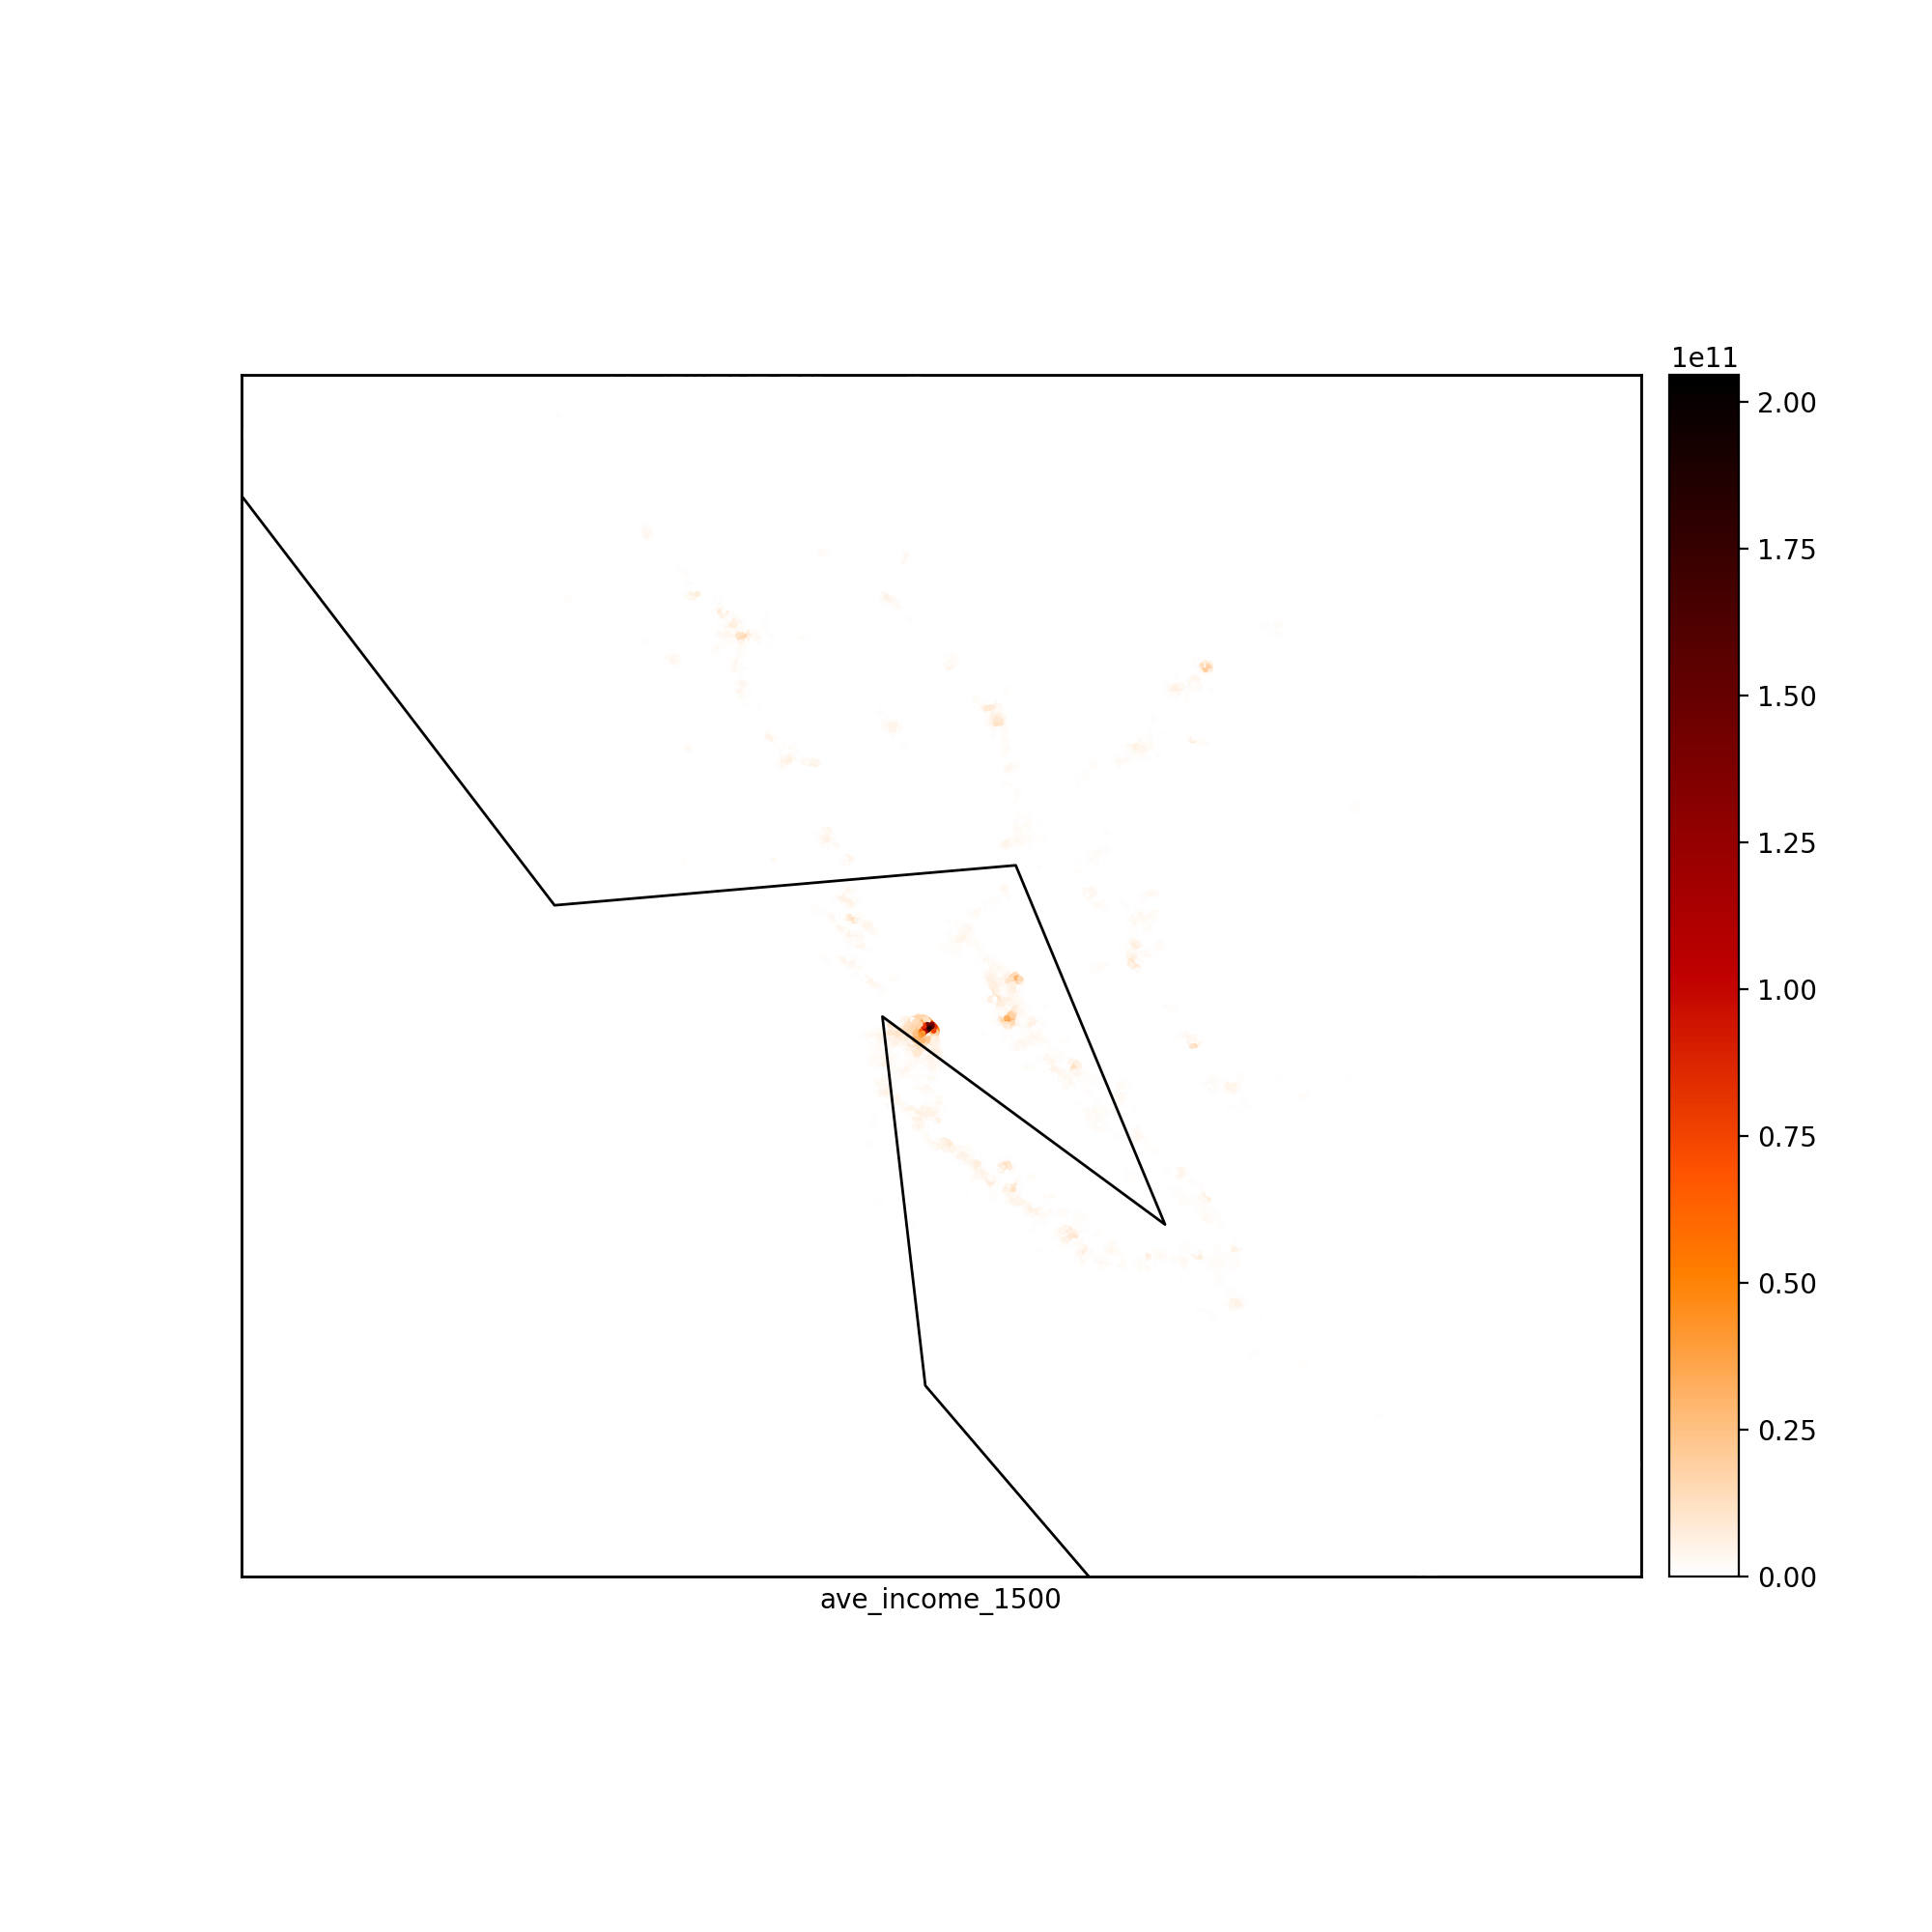

In [8]:
# plot the job_1500

job_1500 = nodesdrive_after.job_1500
print(job_1500.describe())

netdrive.plot(job_1500, plot_type='scatter',
                fig_kwargs={'figsize':[10,10]}, 
                plot_kwargs={'cmap':'gist_heat_r','s':4,'edgecolor':'none'});


### Explore ave_income_1500

In [9]:
ave_income_1500 = nodesdrive_after.ave_income_1500

ave_income_1500.describe()

count    228066.000000
mean     106044.789062
std       48599.953125
min           0.000000
25%       85672.886719
50%      108566.585938
75%      133367.644531
max      658000.000000
Name: ave_income_1500, dtype: float64

In [19]:
len(nodesdrive_after[nodesdrive_after.ave_income_1500 == 0])

21981

<IPython.core.display.Javascript object>


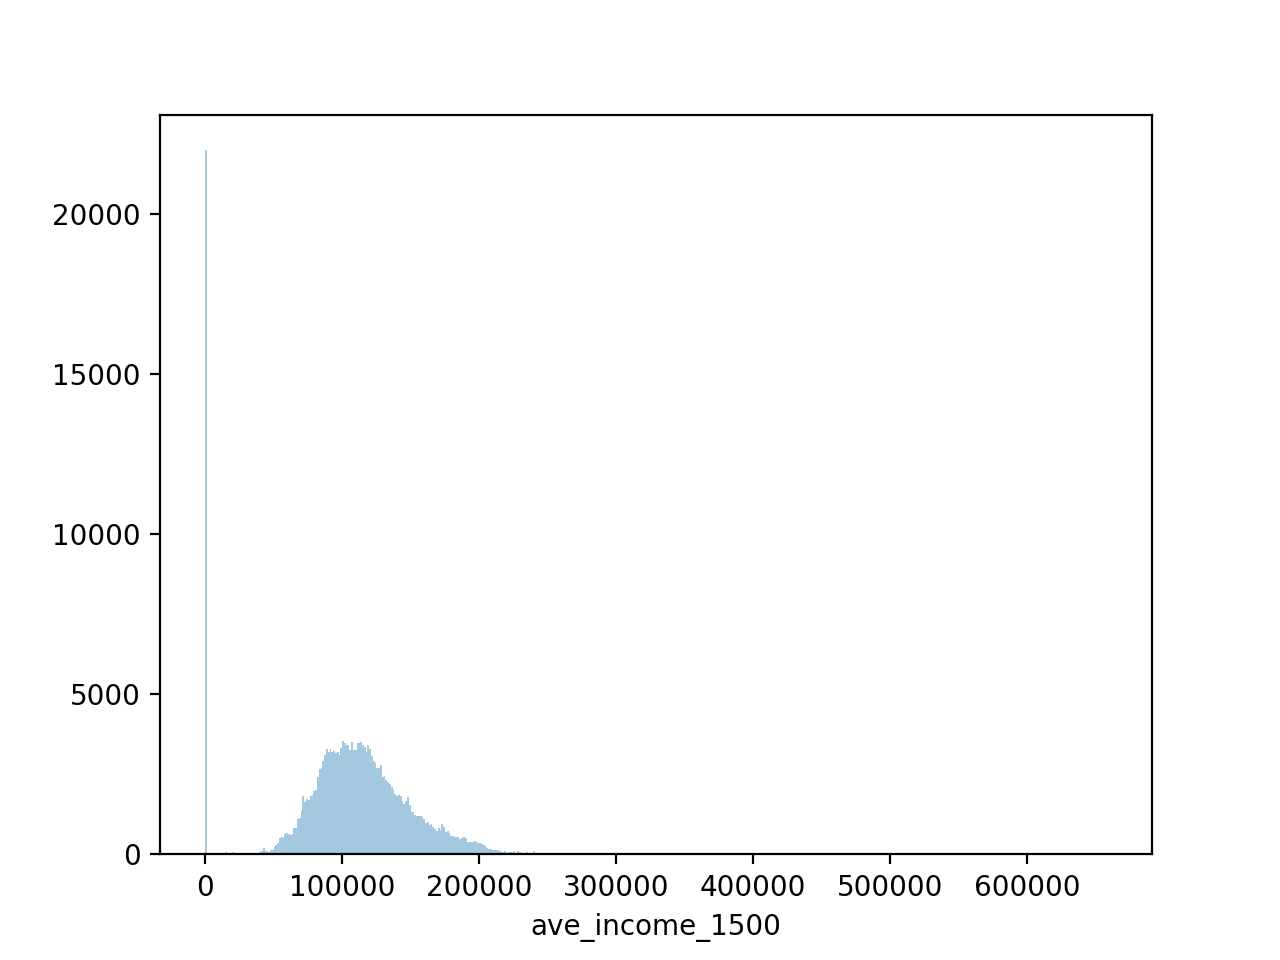

In [15]:
%matplotlib notebook

sns.distplot(nodesdrive_after.ave_income_1500, bins=500, kde=False)


<IPython.core.display.Javascript object>


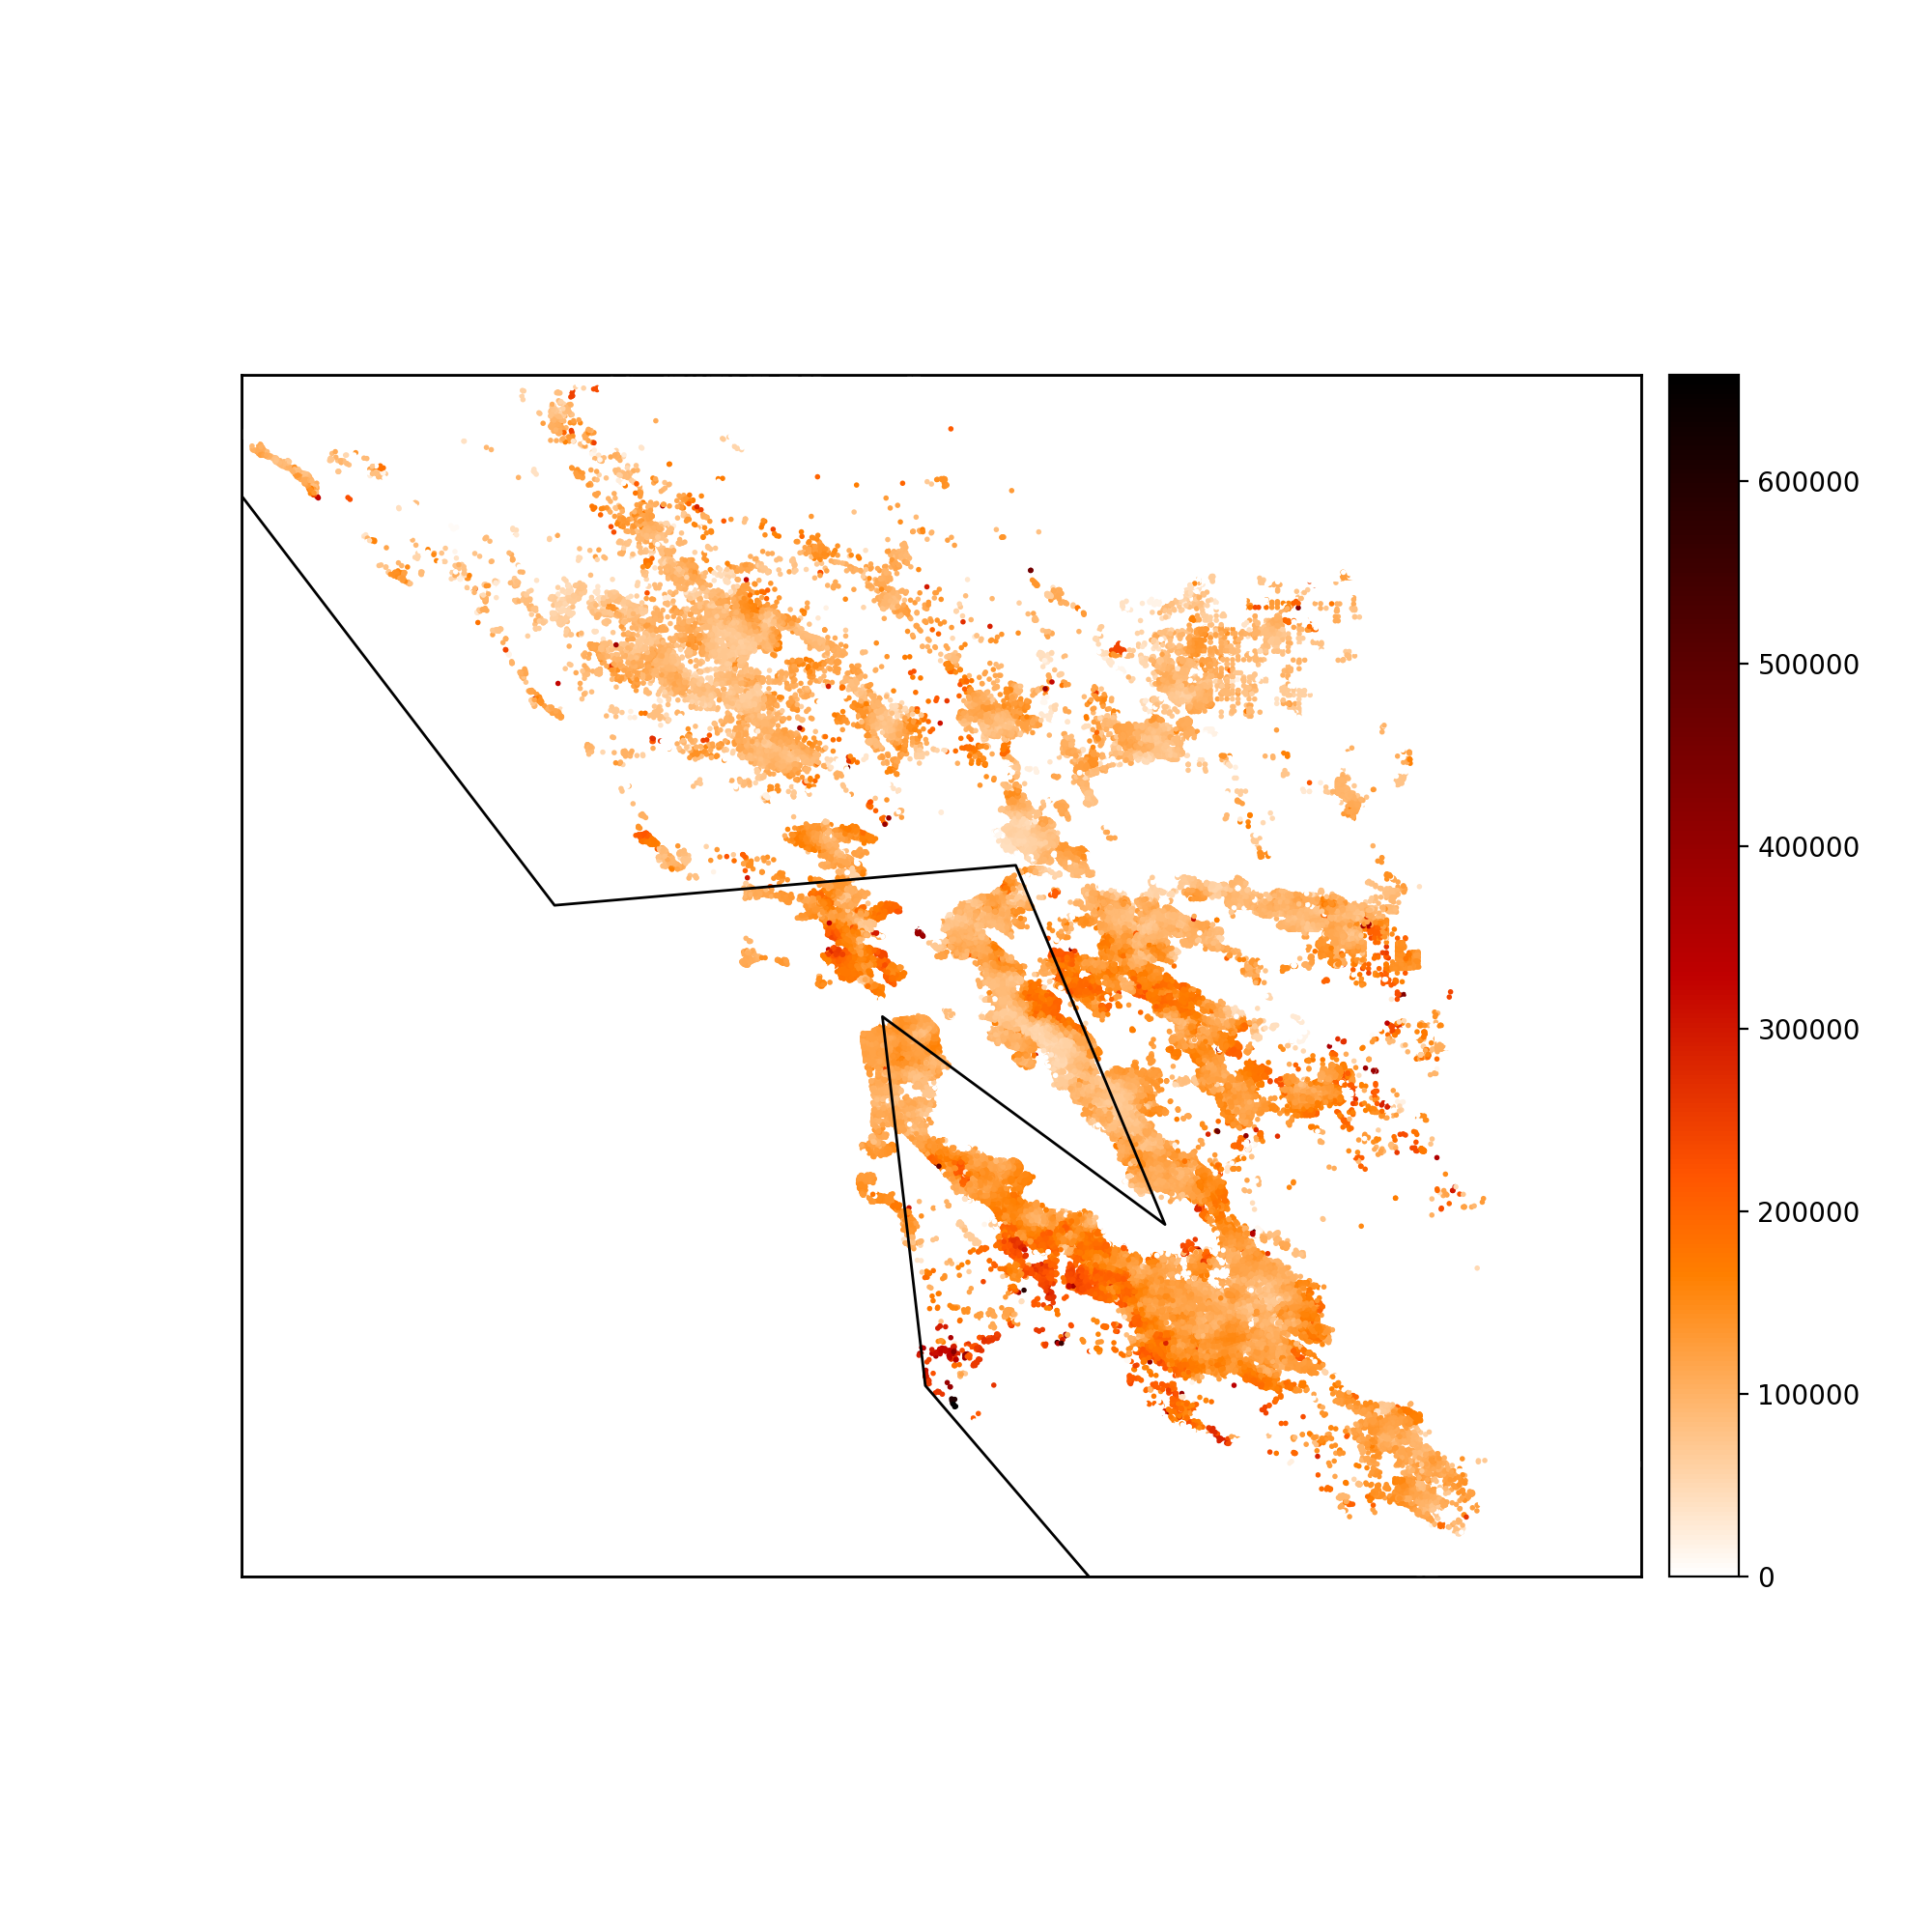

In [20]:
# plot the ave_income_1500

netdrive.plot(ave_income_1500, plot_type='scatter',
                    fig_kwargs={'figsize':[10,10]},
                    plot_kwargs={'cmap':'gist_heat_r','s':4,'edgecolor':'none'});



### Explore med_income_1500

In [ ]:
# plot the med_income_1500

med_income_1500 = nodesdrive_after.med_income_1500

netdrive.plot(med_income_1500, plot_type='scatter',
                    fig_kwargs={'figsize':[10,10]}, plot_kwargs={'cmap':'gist_heat_r','s':4,'edgecolor':'none'});



### Explore population_1500

In [ ]:
population_1500 = nodesdrive_after.population_1500

population_1500.describe()

In [ ]:
# PLOT the population_1500

netdrive.plot(population_1500, plot_type='scatter',
                    fig_kwargs={'figsize':[10,10]},
                    plot_kwargs={'cmap':'gist_heat_r','s':4,'edgecolor':'none'});


### Compare the income distribution of households and med_income by node from household table

In [ ]:
hh= orca.get_table('households').to_frame()

In [ ]:
ax = sns.distplot(hh.income, bins=500, kde=False)

In [ ]:
# Check the distribution after log transformation
filtered = hh[hh.income>0]
ax = sns.distplot(np.log(filtered.income), bins=500, kde=False)

In [ ]:
med_income_by_node = hh.groupby('node_id_drive')[['income']].median().reset_index()

In [ ]:
ax = sns.distplot(med_income_by_node.income, bins=500, kde=False)

In [ ]:

filtered = med_income_by_node[med_income_by_node.income>0]

ax = sns.distplot(np.log(filtered.income), bins=500, kde=False)

In [ ]:
med_income_by_node['osmid'] = med_income_by_node['node_id_drive']

In [ ]:
df = med_income_by_node.set_index('osmid')
data = df['income']

In [ ]:
nodesdrive = nodesdrive.reset_index()

In [ ]:
nodesdrive.head()
print (nodesdrive.shape)
print (med_income_by_node.shape)

In [ ]:
med_income_by_node.osmid = med_income_by_node.osmid.astype(int)

In [ ]:
med_income_by_node_2 = med_income_by_node.merge(nodesdrive, on='osmid', how = 'right')


In [ ]:
print(med_income_by_node_2.shape)
med_income_by_node_2 = med_income_by_node_2.fillna(0)

In [ ]:
med_income_by_node_2['income_filtered'] = np.where(med_income_by_node_2['income']>=200000,0, med_income_by_node_2['income'])

med_income_by_node_2['income_filtered'].describe()

In [ ]:
data = med_income_by_node_2.income
netdrive.plot(data, plot_type='scatter',
                    fig_kwargs={'figsize':[10,10]},
                    plot_kwargs={'cmap':'gist_heat_r','s':4,'edgecolor':'none'});

In [ ]:
data = med_income_by_node_2['income_filtered']
netdrive.plot(data, plot_type='scatter',
                    fig_kwargs={'figsize':[10,10]},
                    plot_kwargs={'cmap':'gist_heat_r','s':4,'edgecolor':'none'});